# Praca domowa nr 1, Bartosz Jamrozy

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [5]:
allegro_df = pd.read_csv('allegro-api-transactions.csv')
allegro_df.head() 

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [6]:
allegro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

In [27]:
# it_location przyjmuje ponad 10 tyś. unikatowych wartości
it_loc=pd.DataFrame(allegro_df.it_location.value_counts())
it_loc

,it_location
Warszawa,23244
Kraków,15135
Łódź,10935
Poznań,10610
Wrocław,8646
...,...
okolice Nowego Sącza,1
wysokie mazowieckie,1
Wysoki Kościół,1
Myaknów Częstochowa,1


Na myśl przychodzi ograniczenie ilości kategorii, np. poprzez rzutowanie do danych województw albo reprezentacji przez wielkość danego miasta. Jednak było by to trudne ponieważ nie wszystkie ogłoszenia traktują it_location w ten sam sposób, najczęściej jest to miasto, ale trafiają się także nazwy  ulic czy inne nazwy własne 

In [43]:

it_loc.head(2000).tail(10)

,it_location
Stróża,18
Stara Łomnica,18
Rojewo,18
Bieliny,18
Jastrząb,18
"Zielona Góra, Drzonków",18
miedzybórz,18
Białystok ul. A. Mickiewicza 27,18
Iłowa,18
"Polska, Sprzedaż Wysyłkowa",18


In [34]:
# wartosci it_locaion powtarzające sie ponad 100 razy
it_loc[it_loc["it_location"]>100]

<class 'pandas.core.frame.DataFrame'>
Index: 10056 entries, Warszawa to Berlin Spandau
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   it_location  10056 non-null  int64
dtypes: int64(1)
memory usage: 415.2+ KB


,it_location
Warszawa,23244
Kraków,15135
Łódź,10935
Poznań,10610
Wrocław,8646
...,...
JAWORZNO,102
Piszczac,102
Łużna,101
Grębocin,101


#  Kodowanie zmiennych kategorycznych

## Target encodin (it_location)

In [46]:
from category_encoders import TargetEncoder
import copy 
encoder = TargetEncoder()
allegro = copy.deepcopy(allegro_df)
allegro['it_location Target Encoded'] = encoder.fit_transform(allegro['it_location'], allegro['price'])
allegro.head()
allegro.sort_values(by=['it_location Target Encoded'])
# allegro[allegro['it_location']=="okolice Nowego Sącza"]
# allegro[allegro['it_location']=="wysokie mazowieckie"]

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,it_location Target Encoded
319218,319218,2016-04-03 19:03:15,5905293216,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Rośliny o...",1,0,Rapid_premium,1.00,0,4481,0,114,woj. Lubelskie,Dom i Ogród,1.001266
55247,55247,2016-04-03 10:56:35,5918394097,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Rośliny o...",1,0,Rapid_premium,1.00,0,7625,0,126,woj. Lubelskie,Dom i Ogród,1.001266
55250,55250,2016-04-03 15:17:19,5918394097,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Rośliny o...",1,0,Rapid_premium,1.00,0,7625,0,126,woj. Lubelskie,Dom i Ogród,1.001266
55251,55251,2016-04-03 16:33:49,5918394097,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Rośliny o...",1,0,Rapid_premium,1.00,0,7625,0,126,woj. Lubelskie,Dom i Ogród,1.001266
55246,55246,2016-04-03 17:15:58,5918394097,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Rośliny o...",1,0,Rapid_premium,1.00,0,7625,0,126,woj. Lubelskie,Dom i Ogród,1.001266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81717,81717,2016-04-03 18:45:34,6081851369,"['Dom i Ogród', 'Meble', 'Przedpokój', 'Ławki']",1,1,wojtek1523,117.99,0,99,0,214,Granowo,Dom i Ogród,4084.608737
110390,110390,2016-04-03 21:43:05,6099297780,"['Motoryzacja', 'Samochody', 'Osobowe', 'Fiat'...",0,1,przewoznikxl,11000.00,0,0,0,145,Granowo,Motoryzacja,4084.608737
258166,258166,2016-04-03 17:22:34,6098088730,"['Motoryzacja', 'Samochody', 'Ciężarowe (pow. ...",1,0,iwka-2006,64900.00,0,0,0,1028,Olawa,Motoryzacja,19747.818655
197590,197590,2016-04-03 22:39:48,6097166615,"['Telefony i Akcesoria', 'Telefony komórkowe',...",1,0,Benito5,2130.00,0,0,0,221,Olawa,Telefony i Akcesoria,19747.818655


Zastosowanie one hot encoding w  przypadku kolumny przyjmującej wiele różnych wartości będzie skutkowało sporym rozrośnięciem się ramki na szerokość .
W tym przypadku kolumna it_location przyjmuje ponad 10 tyś z czego „sensowych wartości, np występujących ponad 100 razy jest ponad 500) Wartości zastosowanie tutaj one hot spowoduje dodanie takiej ilości nowych kolumn 


Target encoding nie powoduje rozrostu, operacja zawiera się w jednej kolumnie, lecz jej wyniki zależą od danego zbioru danych, co może powodować przeuczenie 

## Inne (main_category)

In [48]:
main_category=pd.DataFrame(allegro_df.main_category.value_counts())
main_category


,main_category
Dom i Ogród,91042
"Odzież, Obuwie, Dodatki",54257
Motoryzacja,45941
Dla Dzieci,42107
Uroda,28096
Sport i Turystyka,27532
RTV i AGD,20341
Telefony i Akcesoria,19805
Komputery,14491
Zdrowie,13166



Ostanie osiem kategorii, stanowią poniżej 0.5% obserwacji, wydaje się ze można je połączyć np. instrumenty i sprzęt estradowy, ale za to kategoria nie ruchomości nie przypomina żadnej innej, a jednocześnie będą to najprawdopodobniej jedne z najdroższych pozycji 


### One-hot 

In [61]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=['main_category'])
x=encoder.fit_transform(allegro_one_hot.main_category)
x

,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,main_category_9,main_category_10,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420016,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
420017,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420018,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### BaseN

In [67]:
encoder=ce.BaseNEncoder(cols=['main_category'])
x=encoder.fit_transform(allegro_one_hot.main_category)
x

,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
420015,0,0,0,1,1,0
420016,0,0,1,0,0,1
420017,0,0,0,0,1,0
420018,0,0,1,0,0,0


### Polynomial Coding

In [65]:
encoder=ce.PolynomialEncoder(cols=['main_category'])
x=encoder.fit_transform(allegro_one_hot.main_category)
x

,intercept,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,...,main_category_16,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25
0,1,-0.321208,0.385019,-0.407465,0.397966,-0.364802,0.316363,-0.260636,0.204436,-0.152825,...,-0.002429,0.001117,-0.000478,0.000189,-0.000069,0.000022,-0.000006,0.000002,-3.206860e-07,4.490498e-08
1,1,-0.296500,0.296168,-0.219404,0.091838,0.056123,-0.194685,0.300734,-0.361694,0.376184,...,0.026161,-0.013576,0.006512,-0.002868,0.001149,-0.000413,0.000131,-0.000035,7.696464e-06,-1.167529e-06
2,1,-0.271791,0.214426,-0.068956,-0.104083,0.241331,-0.296894,0.255825,-0.135242,-0.025863,...,-0.119078,0.071643,-0.039341,0.019631,-0.008835,0.003543,-0.001243,0.000370,-8.818865e-05,1.459412e-05
3,1,-0.247083,0.139791,0.047015,-0.211228,0.269392,-0.194685,0.025663,0.157258,-0.272734,...,0.286143,-0.209481,0.136451,-0.079261,0.040921,-0.018611,0.007334,-0.002432,6.413720e-04,-1.167530e-04
4,1,-0.296500,0.296168,-0.219404,0.091838,0.056123,-0.194685,0.300734,-0.361694,0.376184,...,0.026161,-0.013576,0.006512,-0.002868,0.001149,-0.000413,0.000131,-0.000035,7.696464e-06,-1.167529e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,1,-0.197666,0.011847,0.188061,-0.235585,0.092903,0.125275,-0.247212,0.179411,0.025352,...,0.090137,-0.269274,0.354461,-0.340354,0.262732,-0.167967,0.089180,-0.038617,1.298137e-02,-2.953850e-03
420016,1,-0.123542,-0.126760,0.219404,-0.034872,-0.195278,0.183046,0.057288,-0.229554,0.122018,...,-0.219915,-0.021544,0.253169,-0.256279,0.031345,0.237827,-0.370952,0.327745,-1.926922e-01,7.015395e-02
420017,1,-0.296500,0.296168,-0.219404,0.091838,0.056123,-0.194685,0.300734,-0.361694,0.376184,...,0.026161,-0.013576,0.006512,-0.002868,0.001149,-0.000413,0.000131,-0.000035,7.696464e-06,-1.167529e-06
420018,1,-0.148250,-0.087666,0.228808,-0.115397,-0.127065,0.231929,-0.084519,-0.156164,0.232662,...,-0.153735,0.284881,-0.195003,-0.043363,0.269735,-0.366463,0.323213,-0.207995,9.736026e-02,-2.953850e-02


# Uzupełnianie braków
## it_seller_rating 

In [161]:
import random
allegro_numeric=copy.deepcopy(allegro.loc[:,["price","it_seller_rating","it_quantity"]])
# wylosowanie mniejszej próbki
allegro_sample=allegro_numeric.sample(n=40000).reset_index(drop=True)
n=len(allegro_sample)
k=round(n*0.1)
sample=random.sample(range(n),k)

allegro_nan=copy.deepcopy(allegro_sample)
allegro_nan.loc[sample,'it_seller_rating']=[np.NAN for i in range(k)]
allegro_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             40000 non-null  float64
 1   it_seller_rating  36000 non-null  float64
 2   it_quantity       40000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 937.6 KB


In [151]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
allegro_KNNImputer=copy.deepcopy(allegro_nan)
allegro_KNNImputer=imputer.fit_transform(allegro_KNNImputer)
allegro_KNNImputer=pd.DataFrame(allegro_KNNImputer,columns=allegro_nan.columns)

In [141]:
allegro_KNNImputer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40000 non-null  float64
 1   1       40000 non-null  float64
 2   2       40000 non-null  float64
dtypes: float64(3)
memory usage: 937.6 KB


In [164]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(allegro_sample.it_seller_rating, allegro_KNNImputer.it_seller_rating, squared=False)
rmse

50324.23750485717

10 próbek:

In [170]:
rmse_tab=[]
imputer = KNNImputer()
allegro_numeric=copy.deepcopy(allegro.loc[:,["price","it_seller_rating","it_quantity"]])
for i in range(10):
    # wylosowanie mniejszej próbki
    allegro_sample=allegro_numeric.sample(n=40000).reset_index(drop=True)
    n=len(allegro_sample)
    k=round(n*0.1)
    sample=random.sample(range(n),k)

    allegro_nan=copy.deepcopy(allegro_sample)
    allegro_nan.loc[sample,'it_seller_rating']=[np.NAN for i in range(k)]
    
    allegro_KNNImputer=copy.deepcopy(allegro_nan)
    allegro_KNNImputer=imputer.fit_transform(allegro_KNNImputer)
    allegro_KNNImputer=pd.DataFrame(allegro_KNNImputer,columns=allegro_nan.columns)
    
    rmse = mean_squared_error(allegro_sample.it_seller_rating, allegro_KNNImputer.it_seller_rating, squared=False)
    rmse_tab.append(rmse)
print("SDT z RMSE, dla 10 uzupełnień metodą Nearest neighbors 10% braków w kolumnie it_seller_rating: ", np.std(rmse_tab) )    

SDT z RMSE, dla 10 uzupełnień metodą Nearest neighbors 10% braków w kolumnie it_seller_rating:  228.9944461287519


## Uzupełnianie w it_seller_rating i  it_quantity

In [173]:
rmse_tab2=[]
imputer = KNNImputer()
allegro_numeric=copy.deepcopy(allegro.loc[:,["price","it_seller_rating","it_quantity"]])
for i in range(10):
    # wylosowanie mniejszej próbki
    allegro_sample=allegro_numeric.sample(n=40000).reset_index(drop=True)
    n=len(allegro_sample)
    k=round(n*0.1)
    sample=random.sample(range(n),k)
    sample2=random.sample(range(n),k)
    
    allegro_nan=copy.deepcopy(allegro_sample)
    allegro_nan.loc[sample,'it_seller_rating']=[np.NAN for i in range(k)]
    allegro_nan.loc[sample2,'it_quantity']=[np.NAN for i in range(k)]
    
    allegro_KNNImputer=copy.deepcopy(allegro_nan)
    allegro_KNNImputer=imputer.fit_transform(allegro_KNNImputer)
    allegro_KNNImputer=pd.DataFrame(allegro_KNNImputer,columns=allegro_nan.columns)
    
    rmse = mean_squared_error(allegro_sample.it_seller_rating, allegro_KNNImputer.it_seller_rating, squared=False)
    rmse_tab2.append(rmse)
print("SDT z RMSE, dla 10 uzupełnień metodą Nearest neighbors 10% braków w kolumnie it_seller_rating i 10% braków w kolumnie it_quantity:" , np.std(rmse_tab2) )    

SDT z RMSE, dla 10 uzupełnień metodą Nearest neighbors 10% braków w kolumnie it_seller_rating i 10% braków w kolumnie it_quantity: 341.21174912072684


In [183]:
results=pd.DataFrame(data={'test 1 MRSE': rmse_tab,'test 2 MRSE': rmse_tab2})
results

,test 1 MRSE,test 2 MRSE
0,12626.905797,12058.098083
1,12392.460338,13077.859270
2,12350.657480,12062.492099
3,12575.305064,12133.593098
4,11864.612293,12230.287108
5,12447.702732,12490.402326
6,12288.899263,12633.596967
7,12307.419290,11842.043474
8,12075.422692,12516.149458
9,12037.845884,12185.835430


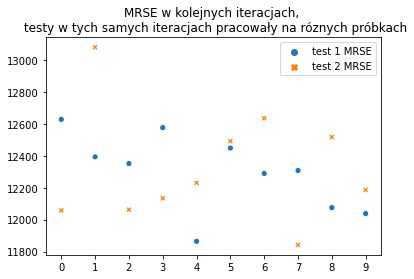

In [193]:
p=sns.scatterplot(data=results)
p.set_xticks(pd.Series([i for i in range(10)]))
p.set_title("MRSE w kolejnych iteracjach, \n testy w tych samych iteracjach pracowały na róźnych próbkach")
plt.show()


W przykładzie drugim odchylenia stada rodowe z błędów średniokwadratowych było większe niż  teście pierwszym (test 2: STD=340, test1: SDT=228) <br />
Jednak patrząc na jednostkowe wyniki, nie widać reguły miedzy większą ilością braków gorszymi wynikami uzupełniania. Jest to proces bardzo mocno zależny od  wylosowanej próbki 


źródło danych: https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1